# Web scraping

Do scrapingu danych z internetu korzystamy z dwóch bibliotek, które pozwalają na:

1. Wysyłanie zapytań HTTP w programie Pythona (zamiast w przeglądarce) - `requests`
2. Interpretację odpowiedzi HTTP tak aby ułatwić jej przeszukiwanie - `bs4` (`BeautifulSoup`)

In [ ]:
import requests
from bs4 import BeautifulSoup

## Środowisko do nauki

https://toscrape.com/

oraz podstrony:

https://quotes.toscrape.com/

https://books.toscrape.com/

## Podstawowe komendy

### Pobieranie kodu HTML

In [ ]:
quotes_url = "https://quotes.toscrape.com/"

response = requests.get(quotes_url)
response

In [ ]:
print(response.text)

In [ ]:
type(response.text)

In [ ]:
soup = BeautifulSoup(response.text, 'html.parser')
soup

In [ ]:
type(soup)

### Parsowanie kodu HTML

#### Ekstrakcja tekstu wewnątrz znaczników HTML

In [ ]:
soup.find("a")

In [ ]:
soup.find_all("a")

In [ ]:
len(soup.find_all("a"))

In [ ]:
first_anchor_tag = soup.find("a")
first_anchor_tag

In [ ]:
page_header = first_anchor_tag.text
page_header

---

In [ ]:
soup.find("h1") #.find("a")

#### Doprecyzowanie znacznika poprzez podanie klasy

In [ ]:
soup.find_all("a", class_="tag")   # oprócz klasy można podawać też inne atrybuty, np. id

#### Wyciąganie wartości atrybutów

In [ ]:
soup.find_all("a")[3]

In [ ]:
soup.find_all("a")[3].attrs

In [ ]:
soup.find_all("a")[3].attrs["href"]

In [ ]:
soup.find_all("a")[3].attrs["class"]

In [ ]:
soup.find_all("a")[3]["class"]

#### Szukanie elementów na podstawie dowolnych atrybutów

In [ ]:
soup.find_all("div", {'itemtype': 'http://schema.org/CreativeWork'})

In [ ]:
soup.find_all("div", {'class': 'quote'})

#### Narzędzia developerskie - devtools

Aby poznać strukturę kodu HTML jeszcze przed scrapingiem wykorzystajmy narządzia developerskie (devtoolsy) 

### Podsumowanie podstawowych poleceń poleceń
#### Pobieranie i parsowanie HTML

In [ ]:
url = "https://example.org"

response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

#### Przeszukiwanie kodu HTML

In [ ]:
soup.find("div")                               # znajdź pierwszy znacznik 'div' jaki napotkasz
soup.find_all("a")                             # znajdź wszystkie znaczniki 'a'
soup.find_all("a", "class_name")               # znajdź wszystkie znaczniki 'a' z klasą class_name
soup.find_all("p")[3].text                     # spośród wszystkich znaczników 'p' weź ten o indeksie 3 i wyciągnij jego zawartość
soup.find("span").attrs["class"]               # znajdź pierwszy znacznik 'span' i wyciągnij nazwę jego klasy
soup.find("h1").find("a")                      # znajdź znacznik "a" wewnątrz znacznika "h1"
soup.find("div", {"attr_name": "attr_value"})  # znajdź znacznik "div" z konkretną wartością danego atrybutu

### Czas na samodzielne przyswojenie wiedzy
Zanim przejdziemy dalej poświęćmy 10 minut na samodzielne eksperymenty oraz ewentualne pytania

## Pobieranie cytatów - zadania rozgrzewkowe
### Treść pojedynczego cytatu
Wyciągnijmy treść pojedynczego cytatu.

Aby wiedzieć czego dokładnie szukamy w kodzie HTML użyjemy devtoolsów przeglądarki.

In [ ]:
quotes_url = "https://quotes.toscrape.com/"
response = requests.get(quotes_url)
soup = BeautifulSoup(response.text, 'html.parser')

In [ ]:
# Wyciągnijmy pierwszy (zerowy) cytat i zapiszmy go do zmiennej
quote = soup.find_all("div", class_="quote")[0]
quote

In [ ]:
# Wychodząc od tego cytatu szukajmy dalej - treść cytatu znajduje się w znaczniku 'span'
text = quote.find("span", class_="text").text
text

In [ ]:
# możemy również zrobić to krócej - jednak nie zawsze bezpośrednie odwołanie zadziała i jeśli element jest bardzo zagnieżdżony należy wyszukiwać go po kolei

soup.find("span", "text").text   

### Lista list tagów

Stwórzmy listę, której elementy będą odpowiadały kolejnym cytatom. Każdy element to lista tagów w danym cytacie

In [ ]:
# chcemy żeby wyglądało to tak: [[tag1, tag2, tag3], [tag2, tag4], ..., [tag5, tag1, tag6]]

outer_list = []

for quote in soup.find_all("div", class_="quote"):     
    inner_list = []
    for tag in quote.find_all("a", class_="tag"):      
        inner_list.append(tag.text)

    outer_list.append(inner_list)                     

In [ ]:
outer_list

### Lista list tagów z kilku podstron

Cytaty znajdują się na kolejnych podstronach. Przejdźmy do następnej strony i pobierzmy kolejne. 

In [ ]:
outer_list = []

for i in range(5):                                         # pętla po kilku podstronach
    for quote in soup.find_all("div", class_="quote"):
        inner_list = []
        for tag in quote.find_all("a", class_="tag"):
            inner_list.append(tag.text)
        
        outer_list.append(inner_list)

    # Zebraliśmy już wszystkie informacje na tej podstronie. Przejdźmy teraz do następnej
    sub_url = soup.find("li", class_="next").find("a").attrs["href"]
    next_page_url = quotes_url + sub_url
    response = requests.get(next_page_url)
    soup = BeautifulSoup(response.text, 'html.parser')

In [ ]:
outer_list

### Więcej informacji o cytatach - tekst, autor oraz lista tagów

Utwórzmy strukturę danych, w której przechowamy zarówno tekst jak i autora oraz tagi poszczególnych cytatów.

`[{"text": "text of the quote", "author": "Quote Author", "tags": ["tag1", "tag2", "tag3"]},
 ...
 ]`

In [ ]:
quotes_url = "https://quotes.toscrape.com/"
response = requests.get(quotes_url)
soup = BeautifulSoup(response.text, 'html.parser')

quotes_list = []
for i in range(5):
    for quote in soup.find_all("div", class_="quote"):
        
        single_quote = dict()
        
        single_quote["text"] = quote.find("span", class_="text").text.replace('“', '').replace('”', '')
        
        single_quote["author"] = quote.find("small", class_="author").text
        
        tags = quote.find_all("a", "tag")
        tags_texts = [t.text for t in tags]
        single_quote["tags"] = tags_texts
        
        quotes_list.append(single_quote)
        
    sub_url = soup.find("li", class_="next").find("a").attrs["href"]
    next_page_url = quotes_url + sub_url
    response = requests.get(next_page_url)
    soup = BeautifulSoup(response.text, 'html.parser')

In [ ]:
quotes_list

In [ ]:
quotes_list[0]

In [ ]:
quotes_list[14]

## Zadania
### Pobieranie cytatów z innej strony

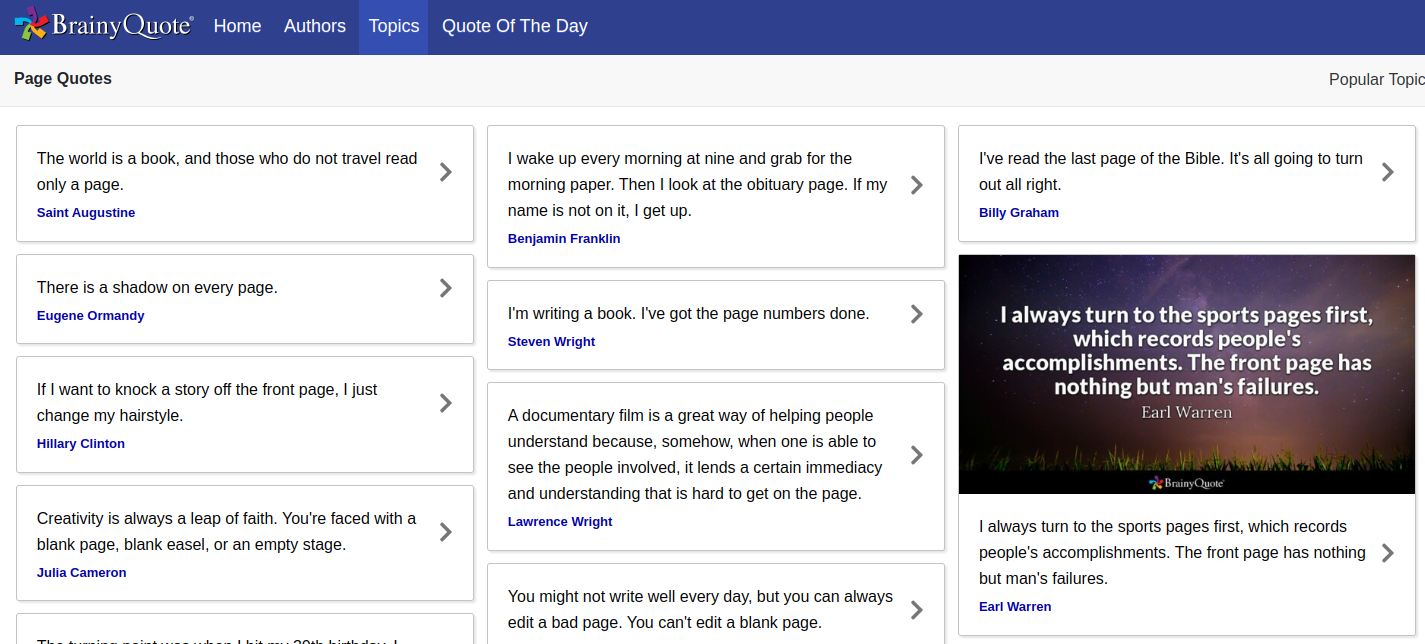

Pierwsze zadanie będzie wyglądało analogicznie jak ostatni przykład, ale wykorzystamy inną stronę internetową. Zasada działania jest podobna, ale należy dostosować się do innej specyfiki kodu HTML.

https://www.brainyquote.com/topics/page-quotes

Postaraj się napisać wszystko od początku bez kopiowania kodu Pythona.

Podpowiedzi:
- jeśli jakiś element ma kilka klas, wystarczy podać jedną (przykład: `<div class="class_1 class_2 class_3">` -> `soup.find("div", class_="class_2")`
- czasami przechodzenie do kolejnej strony wymaga kreatywności, nie istnieje jeden sprawdzony sposób, który wykorzystujemy za każdym razem
- jeśli wolisz wykonać zadanie wykorzystując IDE i skrypt `.py` nic nie stoi na przeszkodzie

Czas: ok. 30 minut

In [ ]:
# ...

### Pobieranie danych o książkach

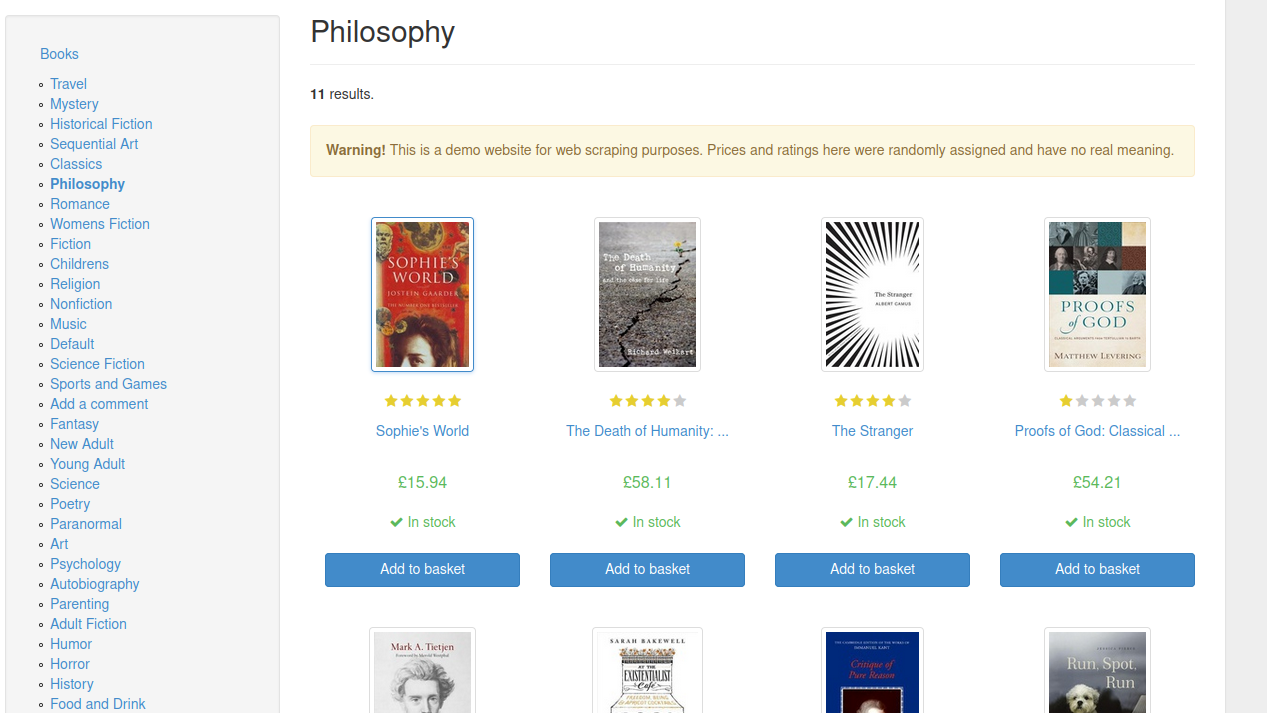

Ze strony https://books.toscrape.com/ pobierz dane o książkach z kategorii "Philosphy", "Music" oraz "Autobiography". Utwórz strukturę danych wyglądającą w następujący sposób:

``` json
{
"Philosophy": [{"title": "Sophie's World", "price": 15.94, "rating": 5, "UPC": "6be3beb0793a53e7"},
                {...},
                 ...
                {...}
              ],              
"Music": [ ...... ],
"Autobiography": [ ..... ]
}
```

Uwagi: 

- wyciągnięcie parametrów "rating" oraz "UPC" może być trudniejsze niż dwóch pierwszych. Spróbuj poeksperymentować w ramach tego co już wiesz. Jeśli się nie uda - nie szkodzi. Nauka web scrapingu wymaga praktyki, biegłość przyjdzie z czasem
- jeśli chcesz, możesz dowolnie zmodyfikować treść zadania. Możesz wyciągnąć więcej informacji lub inne niż te, które zostały zasugerowane
- tak jak poprzednie zadanie, również to możesz wykonać korzystając z dowolnego IDE

Czas: ok. 35 minut

In [ ]:
# ...

### Pobieranie informacji o ocenach książek

Zescrapuj powyższą stronę w taki sposób, aby uzyskać słownik którego klucze to nazwy kategorii książek a wartości to średnia ocena książki w danej kategorii.

Przykładowe rozwiązanie:

``` json
{
    "Travel": 4.5,
    "Mystery": 3.9,
    ...
    "Crime": 4.1

}
```

Czas: ok. 35 minut

In [ ]:
# ...

## Projekt - scraping ofert na portalu otomoto
Napisz scraper który pobierze oferty samochodów z portalu https://www.otomoto.pl/. Pobierz dla każdego samochodu dowolne informacje jakie Cię interesują, np. cenę, markę samochodu, rodzaj paliwa itp. Wynik powinien byc listą słowników.

Uwagi: 
- przy dużej liczbie requestów w krótkim czasie Twój adres IP może zostać tymczasowo zablokowany. Warto rozważyć stopowanie kodu na ułamek sekundy co jakiś czas i oszczędne requestowanie podczas testów
- czasami element do którego chcemy się dostać jest zbyt głęboko zagnieżdżony w kodzie HTML. Spróbuj wtedy najpierw wyciągnąć element mniej zagnieżdżony, i następnie przeszukuj go dalej

Zadanie składa się z dwóch części:

1. Napisz funkcję, która przyjmuje link do pojedynczej oferty oraz zwraca informacje o samochodzie w postaci słownika (30 minut)

In [ ]:
# ...

2. Napisz skrypt, który (korzystając z powyższej funkcji) pobiera wyniki wyszukiwania z kilku podstron i generuje jako wynik listę słowników (30 minut)

In [ ]:
# ...

## Scrapy
https://www.youtube.com/watch?v=vkA1cWN4DEc&list=PLZyvi_9gamL-EE3zQJbU5N3nzJcfNeFHU&index=3

Web Scraping vs. Web Crawling

Scraping - pobieranie danych według ściśle określonego scenariusza, zestawu gotowych instrukcji. Jest to proces deterministyczny, z góry zaplanowany

Crawling - zaczynamy od punktu wyjściowego (jednego albo więcej) a następnie przechodzimy przez tekst odnajdując linki do innych stron. Następnie wchodzimy w podlinkowane strony i kontynuujemy proces. Nie wiemy z góry co napotkamy, jest to proces niedeterministyczny

```
pip install Scrapy
```

### Scrapy shell

```
scrapy shell https://quotes.toscrape.com
```

```
response
print(response.text)
```

```
response.css('small.author')
response.css('small.author').extract()
response.css('small.author::text').extract()
len(response.css('small.author::text').extract())
response.css('small.author::text').extract_first()
```

```
response.css('span.text').extract_first()
response.css('span.text::text').extract_first()
response.css('a.tag').extract()
```

### ScrapySpider

```
scrapy genspider quotes toscrape.com
```

In [ ]:
!cat quotes.py

In [ ]:
%%writefile quotes.py
import scrapy


class QuotesSpider(scrapy.Spider):
    name = 'quotes'
    allowed_domains = ['toscrape.com']
    start_urls = ['https://quotes.toscrape.com/random']

    def parse(self, response):
        self.log(f'I just visited {response.url}')

```
scrapy runspider quotes.py
```

---

In [ ]:
%%writefile quotes.py
import scrapy


class QuotesSpider(scrapy.Spider):
    name = 'quotes'
    allowed_domains = ['toscrape.com']
    start_urls = ['https://quotes.toscrape.com/random']

    def parse(self, response):
        self.log(f'I just visited {response.url}')
        yield {
            "author": response.css("small.author::text").extract_first(),
            "text": response.css("span.text::text").extract_first(),
            "tags": response.css("a.tag::text").extract()
        }

```
scrapy runspider quotes.py
scrapy runspider quotes.py -o result.json
```

### Pobranie wszystkich cytatów ze strony

```
scrapy shell https://quotes.toscrape.com

response.css('small.author::text').extract_first()
response.css('small.author::text').extract()
response.css('span.text::text').extract()
response.css('a.tag::text').extract()

response.css('div.quote')[0].css('a.tag::text').extract()
for quote in response.css('div.quote'):
    item = {'author_name': quote.css('small.author::text').extract_first(), 'text': quote.css('span.text::text').extract_first(), 'tags': quote.css('a.tag::text').extract()}
    print(item)

```

In [ ]:
%%writefile quotes.py
import scrapy


class QuotesSpider(scrapy.Spider):
    name = 'quotes'
    allowed_domains = ['toscrape.com']
    start_urls = ['https://quotes.toscrape.com']

    def parse(self, response):
        self.log(f'I just visited {response.url}')
        
        for quote in response.css('div.quote'):
            item = {'author_name': quote.css('small.author::text').extract_first(),
                    'text': quote.css('span.text::text').extract_first(),
                    'tags': quote.css('a.tag::text').extract()}
            yield item

```
rm result.json
scrapy runspider quotes.py -o result.json
```

### Przechodzenie miedzy stronami

```
scrapy shell https://quotes.toscrape.com
```

```
response.css('li.next > a').extract_first()
response.css('li.next > a::attr(href)').extract_first()
response.urljoin(response.css('li.next > a::attr(href)').extract_first())
```

In [ ]:
%%writefile quotes.py
import scrapy


class QuotesSpider(scrapy.Spider):
    name = 'quotes'
    allowed_domains = ['toscrape.com']
    start_urls = ['https://quotes.toscrape.com']

    def parse(self, response):
        self.log(f'I just visited {response.url}')
        
        for quote in response.css('div.quote'):
            item = {'author_name': quote.css('small.author::text').extract_first(),
                    'text': quote.css('span.text::text').extract_first(),
                    'tags': quote.css('a.tag::text').extract()}
            yield item
            
        next_page_url = response.urljoin(response.css('li.next > a::attr(href)').extract_first())
        
        if next_page_url:
            yield scrapy.Request(url=next_page_url, callback=self.parse)